<a href="https://colab.research.google.com/github/Binod1028/Concepts-and-Technologies-of-AI-Final-Assessment/blob/main/Regression_Task_Binod_Chaudhary_2517284.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## 2. Data Loading and Preprocessing

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Neural Network libraries
from sklearn.neural_network import MLPRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


In [42]:
# Load the dataset
df = pd.read_csv('/content/Final_data.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (20000, 54)

First few rows:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [43]:
# Display basic information about the dataset
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Fre

In [44]:
# Check for missing values
print("Missing Values Summary:")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found in the dataset!")

Missing Values Summary:
No missing values found in the dataset!


In [45]:
# Check target variable statistics
print("Target Variable (Calories_Burned) Statistics:")
print("="*50)
print(df['Calories_Burned'].describe())

# Check for outliers
Q1 = df['Calories_Burned'].quantile(0.25)
Q3 = df['Calories_Burned'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Calories_Burned'] < lower_bound) | (df['Calories_Burned'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

Target Variable (Calories_Burned) Statistics:
count    20000.000000
mean      1280.109600
std        502.228982
min        323.110000
25%        910.800000
50%       1231.450000
75%       1553.112500
max       2890.820000
Name: Calories_Burned, dtype: float64

Number of outliers: 507 (2.54%)


---
## 3. Exploratory Data Analysis

### 3.1 Statistical Summary

In [46]:
# Statistical summary of numerical features
print("Statistical Summary of Numerical Features:")
print("="*50)
df.describe().T

Statistical Summary of Numerical Features:


,count,mean,std,min,25%,50%,75%,max
Age,20000.0,3.885145e+01,1.211458e+01,1.800000e+01,2.817000e+01,3.986500e+01,4.963000e+01,5.967000e+01
Weight (kg),20000.0,7.389883e+01,2.117301e+01,3.918000e+01,5.816000e+01,7.000000e+01,8.610000e+01,1.307700e+02
Height (m),20000.0,1.723093e+00,1.270328e-01,1.490000e+00,1.620000e+00,1.710000e+00,1.800000e+00,2.010000e+00
Max_BPM,20000.0,1.798897e+02,1.151081e+01,1.593100e+02,1.700575e+02,1.801400e+02,1.894250e+02,1.996400e+02
Avg_BPM,20000.0,1.437043e+02,1.426769e+01,1.190700e+02,1.312200e+02,1.429900e+02,1.560600e+02,1.698400e+02
Resting_BPM,20000.0,6.219581e+01,7.289351e+00,4.949000e+01,5.596000e+01,6.220000e+01,6.809000e+01,7.450000e+01
Session_Duration (hours),20000.0,1.259446e+00,3.413362e-01,4.900000e-01,1.050000e+00,1.270000e+00,1.460000e+00,2.020000e+00
Calories_Burned,20000.0,1.280110e+03,5.022290e+02,3.231100e+02,9.108000e+02,1.231450e+03,1.553112e+03,2.890820e+03
Fat_Percentage,20000.0,2.610131e+01,4.996160e+00,1.133313e+01,2.238781e+01,2.582250e+01,2.967603e+01,3.500000e+01
Water_Intake (liters),20000.0,2.627485e+00,6.047240e-01,1.460000e+00,2.170000e+00,2.610000e+00,3.120000e+00,3.730000e+00


### 3.2 Data Visualization

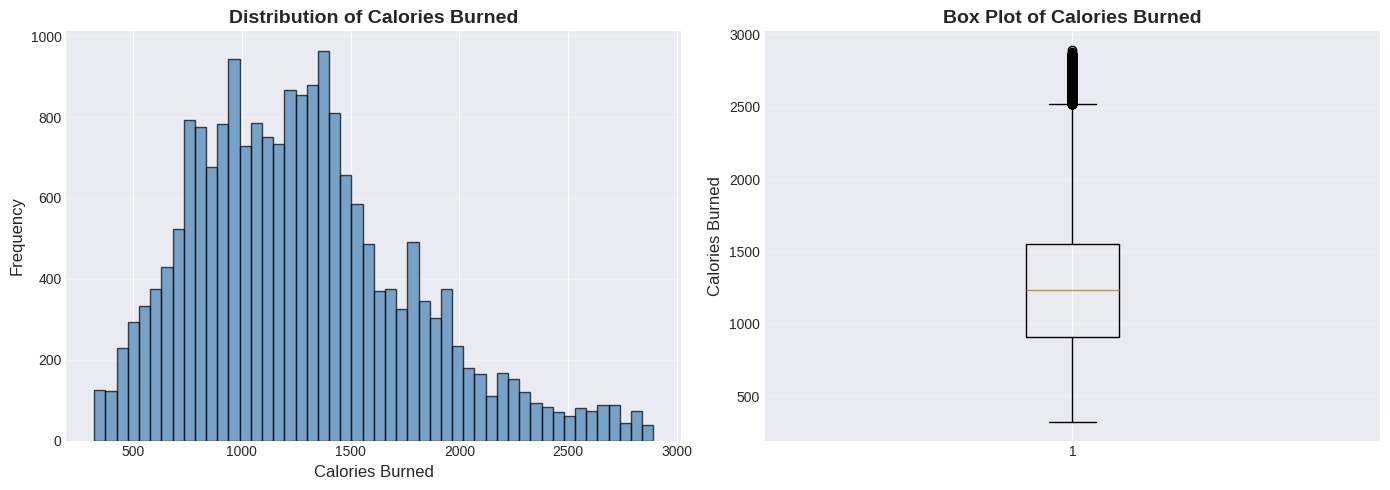

Insight: The target variable shows a relatively normal distribution with some variation.
The box plot reveals the presence of some outliers which is expected in real-world data.


In [47]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Calories_Burned'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Calories Burned', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Calories Burned', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df['Calories_Burned'], vert=True)
axes[1].set_title('Box Plot of Calories Burned', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Calories Burned', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight: The target variable shows a relatively normal distribution with some variation.")
print("The box plot reveals the presence of some outliers which is expected in real-world data.")

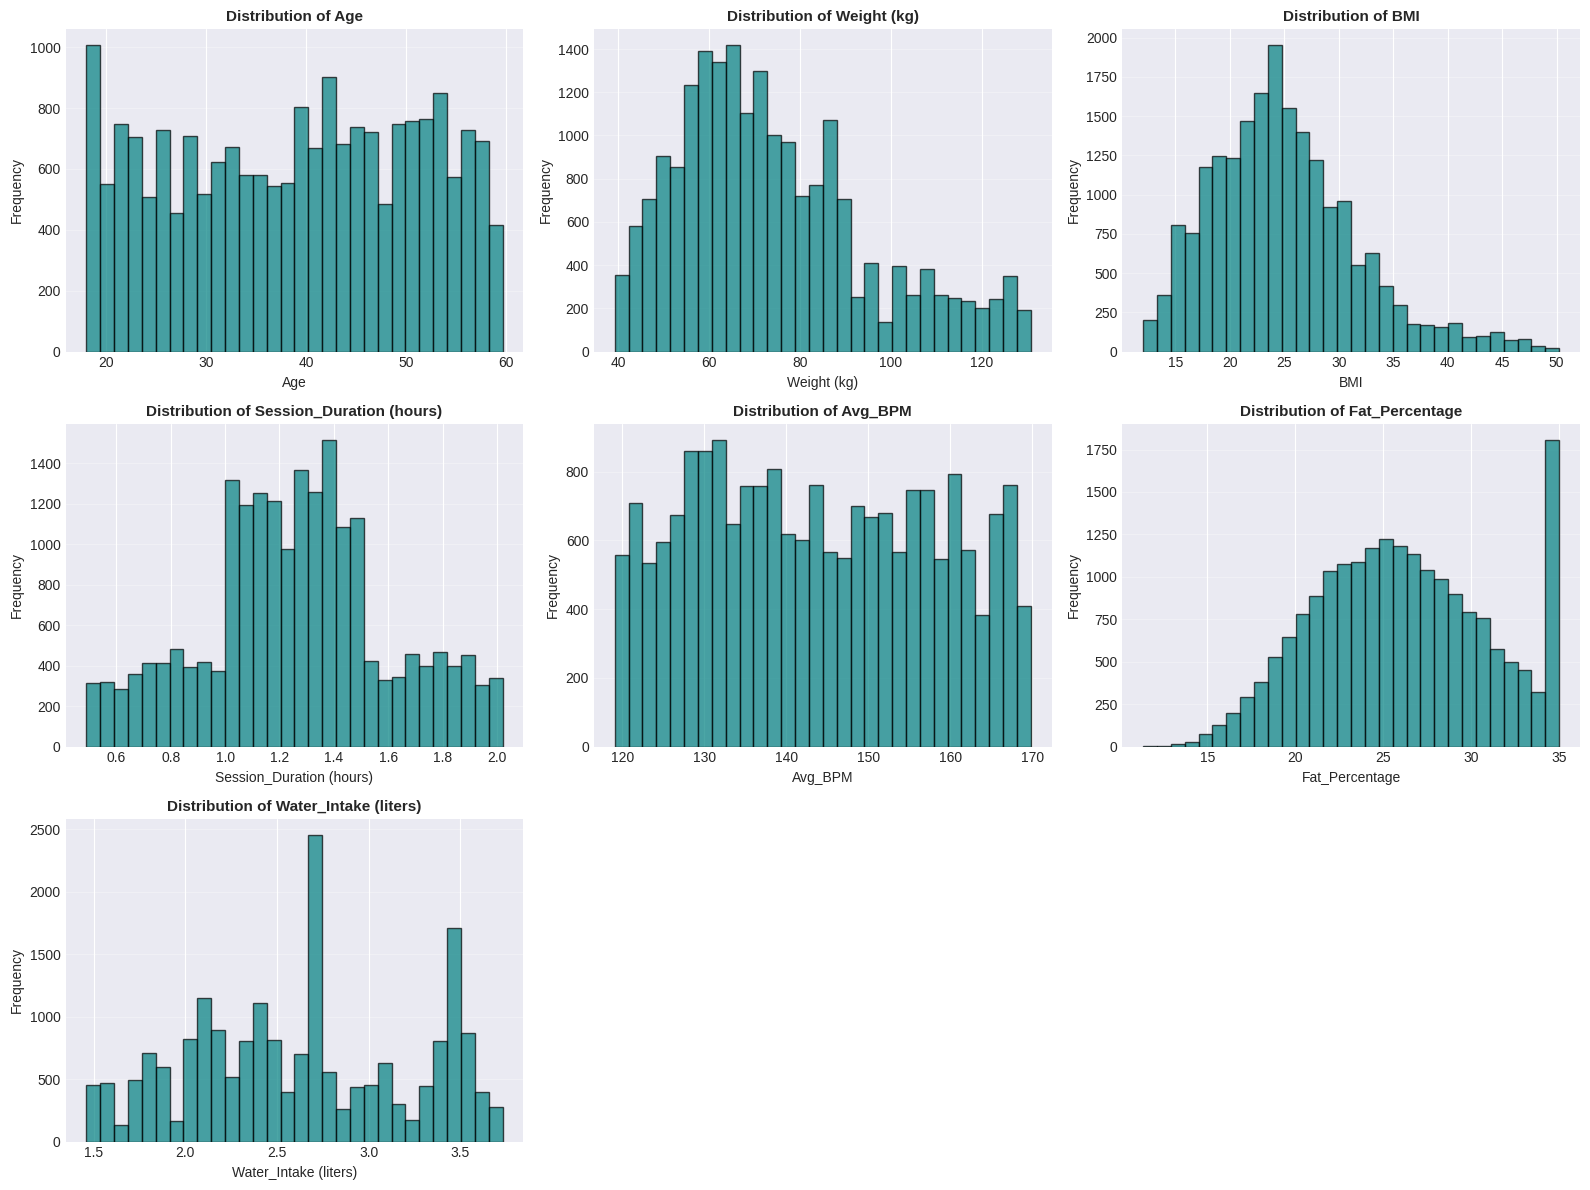

Insight: These distributions show the spread of key features in the dataset.
Most features exhibit reasonable distributions suitable for modeling.


In [48]:
# Analyze key numerical features
key_features = ['Age', 'Weight (kg)', 'BMI', 'Session_Duration (hours)',
                'Avg_BPM', 'Fat_Percentage', 'Water_Intake (liters)']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].hist(df[feature].dropna(), bins=30, color='teal', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplots
for idx in range(len(key_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print("Insight: These distributions show the spread of key features in the dataset.")
print("Most features exhibit reasonable distributions suitable for modeling.")

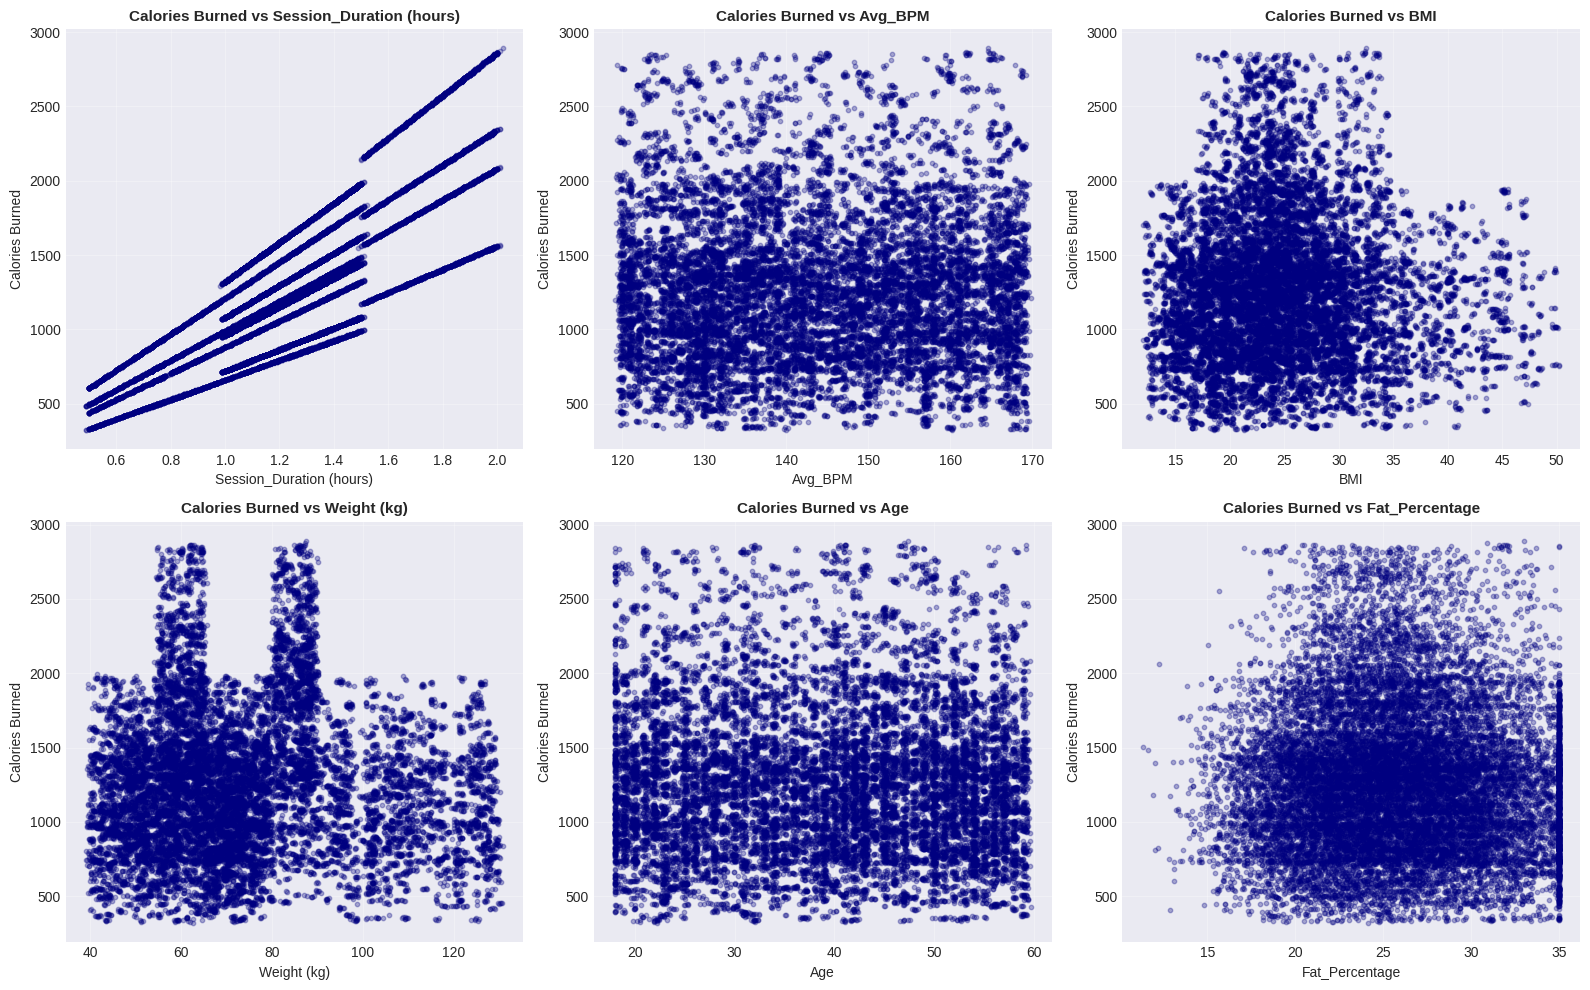

Insight: Scatter plots reveal relationships between features and the target variable.
Session duration shows a strong positive correlation with calories burned.


In [49]:
# Scatter plots: Target vs Key Features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

scatter_features = ['Session_Duration (hours)', 'Avg_BPM', 'BMI',
                    'Weight (kg)', 'Age', 'Fat_Percentage']

for idx, feature in enumerate(scatter_features):
    axes[idx].scatter(df[feature], df['Calories_Burned'], alpha=0.3, s=10, color='navy')
    axes[idx].set_title(f'Calories Burned vs {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Calories Burned', fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight: Scatter plots reveal relationships between features and the target variable.")
print("Session duration shows a strong positive correlation with calories burned.")

Top 15 Features Correlated with Calories Burned:
Calories_Burned                  1.000000
Session_Duration (hours)         0.814368
expected_burn                    0.773932
Experience_Level                 0.697116
Workout_Frequency (days/week)    0.582787
Water_Intake (liters)            0.262731
cholesterol_mg                   0.072296
Physical exercise                0.049113
Calories                         0.047981
Reps                             0.043237
serving_size_g                   0.029458
Daily meals frequency            0.028158
rating                           0.025625
Sets                             0.024164
lean_mass_kg                     0.023134
Name: Calories_Burned, dtype: float64


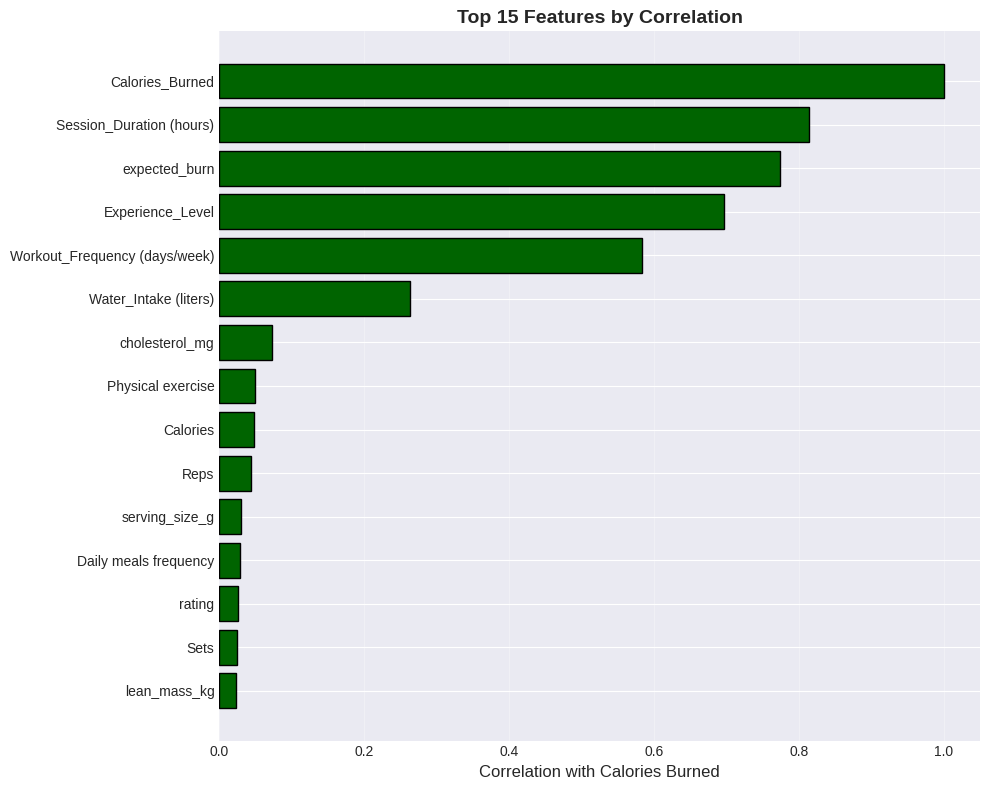


Insight: Session duration, heart rate metrics, and BMI show strong correlations.


In [50]:
# Correlation analysis for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation with target
correlations = df[numerical_cols].corr()['Calories_Burned'].sort_values(ascending=False)

print("Top 15 Features Correlated with Calories Burned:")
print("="*50)
print(correlations.head(15))

# Visualize top correlations
plt.figure(figsize=(10, 8))
top_corr = correlations.head(15)
plt.barh(range(len(top_corr)), top_corr.values, color='darkgreen', edgecolor='black')
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlation with Calories Burned', fontsize=12)
plt.title('Top 15 Features by Correlation', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInsight: Session duration, heart rate metrics, and BMI show strong correlations.")

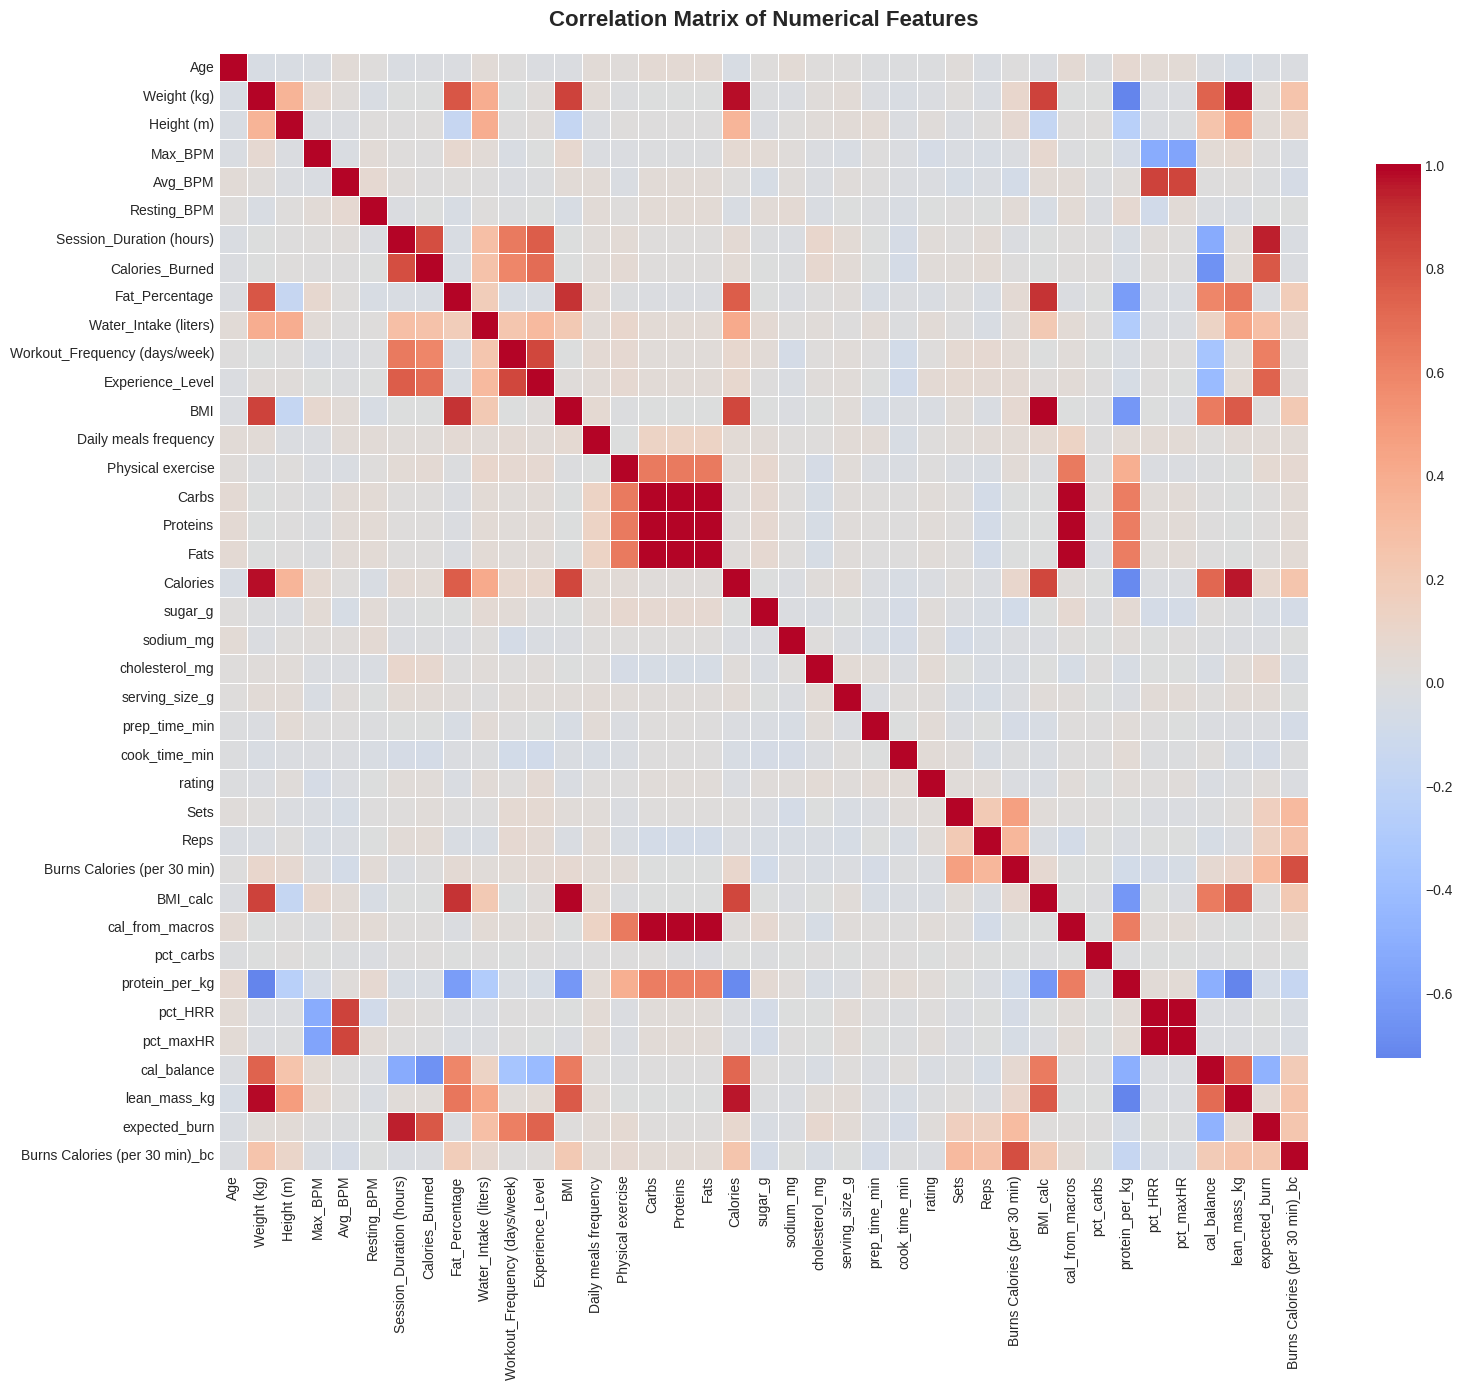

Insight: The heatmap reveals multicollinearity between some features.
Strong correlations exist between related features like BMI and weight.


In [51]:
# Full correlation matrix
plt.figure(figsize=(16, 14))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Insight: The heatmap reveals multicollinearity between some features.")
print("Strong correlations exist between related features like BMI and weight.")

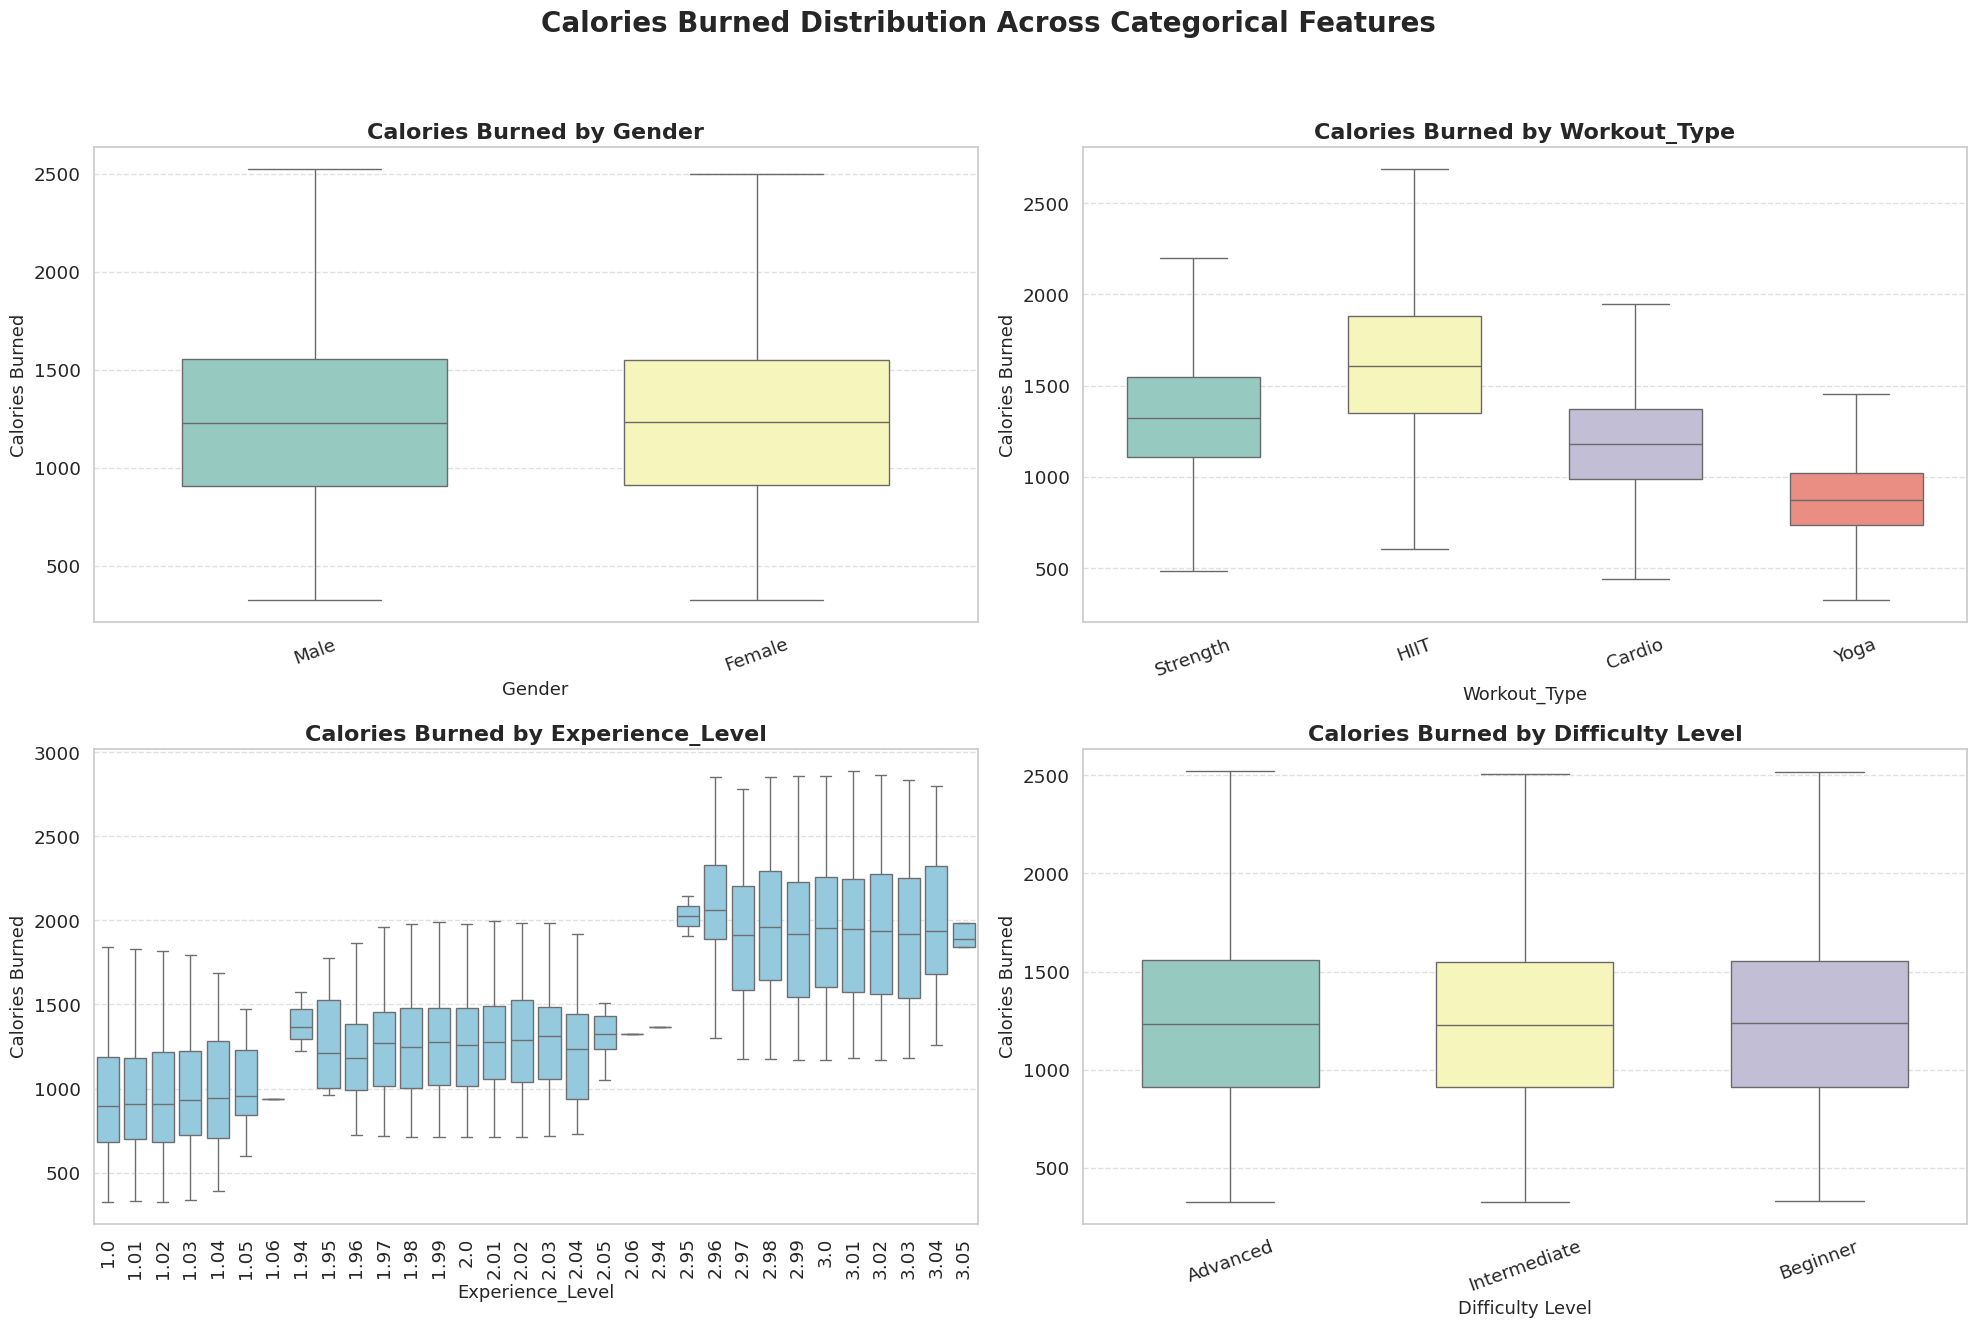

In [81]:

sns.set_theme(style="whitegrid", font_scale=1.2)

categorical_features = ['Gender', 'Workout_Type', 'Experience_Level', 'Difficulty Level']

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):

    if feature == 'Experience_Level':
        sns.boxplot(
            data=df,
            x=feature,
            y='Calories_Burned',
            ax=axes[idx],
            showfliers=False,
            color='skyblue'
        )
        axes[idx].tick_params(axis='x', rotation=90)

    else:
        sns.boxplot(
            data=df,
            x=feature,
            y='Calories_Burned',
            ax=axes[idx],
            showfliers=False,
            palette='Set3',
            width=0.6
        )
        axes[idx].tick_params(axis='x', rotation=20)

    axes[idx].set_title(f'Calories Burned by {feature}', fontsize=16, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=13)
    axes[idx].set_ylabel('Calories Burned', fontsize=13)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle(
    'Calories Burned Distribution Across Categorical Features',
    fontsize=20,
    fontweight='bold'
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



### 3.3 Data Preprocessing for Modeling

In [53]:
# Prepare data for modeling
df_model = df.copy()

# Identify categorical columns
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()

print(f"Categorical columns to encode: {len(categorical_cols)}")
print(categorical_cols[:10])  # Show first 10

# Label encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

print("\nData preprocessing completed!")

Categorical columns to encode: 15
['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type', 'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group', 'Equipment Needed']

Data preprocessing completed!


In [54]:
# Prepare features and target
X = df_model.drop(['Calories_Burned', 'Burns_Calories_Bin'], axis=1)
y = df_model['Calories_Burned']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nTarget statistics:")
print(y.describe())

Feature matrix shape: (20000, 52)
Target vector shape: (20000,)

Target statistics:
count    20000.000000
mean      1280.109600
std        502.228982
min        323.110000
25%        910.800000
50%       1231.450000
75%       1553.112500
max       2890.820000
Name: Calories_Burned, dtype: float64


In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining target statistics:")
print(y_train.describe())
print(f"\nTesting target statistics:")
print(y_test.describe())

Training set size: 16000 samples
Testing set size: 4000 samples

Training target statistics:
count    16000.000000
mean      1280.540542
std        502.937191
min        323.110000
25%        909.970000
50%       1233.120000
75%       1551.010000
max       2890.820000
Name: Calories_Burned, dtype: float64

Testing target statistics:
count    4000.000000
mean     1278.385833
std       499.444998
min       330.000000
25%       911.990000
50%      1228.720000
75%      1560.900000
max      2864.400000
Name: Calories_Burned, dtype: float64


In [56]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")

Feature scaling completed!
Scaled training data shape: (16000, 52)
Scaled testing data shape: (4000, 52)


---
## 4. Task 1: Neural Network Model

### 4.1 Model Architecture

Building a Multi-Layer Perceptron (MLP) regressor with the following architecture:
- **Input Layer:** 51 features (all available features except target)
- **Hidden Layers:** Three hidden layers with 128, 64, and 32 neurons respectively
- **Activation Function:** ReLU (Rectified Linear Unit) for hidden layers
- **Output Layer:** 1 neuron (continuous output for calories burned)
- **Loss Function:** Mean Squared Error (MSE)
- **Optimizer:** Adam optimizer
- **Regularization:** L2 regularization (alpha=0.0001)

In [57]:
# Build Neural Network Regressor
nn_regressor = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    verbose=False,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

print("Neural Network Architecture:")
print("="*50)
print(f"Input Layer: {X_train_scaled.shape[1]} features")
print(f"Hidden Layer 1: 128 neurons (ReLU activation)")
print(f"Hidden Layer 2: 64 neurons (ReLU activation)")
print(f"Hidden Layer 3: 32 neurons (ReLU activation)")
print(f"Output Layer: 1 neuron (linear activation)")
print(f"Optimizer: Adam")
print(f"Loss Function: Mean Squared Error")
print(f"L2 Regularization: alpha=0.0001")

Neural Network Architecture:
Input Layer: 52 features
Hidden Layer 1: 128 neurons (ReLU activation)
Hidden Layer 2: 64 neurons (ReLU activation)
Hidden Layer 3: 32 neurons (ReLU activation)
Output Layer: 1 neuron (linear activation)
Optimizer: Adam
Loss Function: Mean Squared Error
L2 Regularization: alpha=0.0001


In [58]:
# Train the Neural Network
print("Training Neural Network...")
nn_regressor.fit(X_train_scaled, y_train)
print(f"Training completed in {nn_regressor.n_iter_} iterations")
print(f"Final training loss: {nn_regressor.loss_:.4f}")

Training Neural Network...
Training completed in 82 iterations
Final training loss: 42.4675


### 4.2 Model Evaluation

In [59]:
# Make predictions
y_train_pred_nn = nn_regressor.predict(X_train_scaled)
y_test_pred_nn = nn_regressor.predict(X_test_scaled)

# Calculate metrics for training set
train_mae_nn = mean_absolute_error(y_train, y_train_pred_nn)
train_rmse_nn = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
train_r2_nn = r2_score(y_train, y_train_pred_nn)

# Calculate metrics for testing set
test_mae_nn = mean_absolute_error(y_test, y_test_pred_nn)
test_rmse_nn = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))
test_r2_nn = r2_score(y_test, y_test_pred_nn)

print("Neural Network Performance:")
print("="*60)
print("\nTraining Set Metrics:")
print(f"  MAE:       {train_mae_nn:.4f}")
print(f"  RMSE:      {train_rmse_nn:.4f}")
print(f"  R-squared: {train_r2_nn:.4f}")

print("\nTesting Set Metrics:")
print(f"  MAE:       {test_mae_nn:.4f}")
print(f"  RMSE:      {test_rmse_nn:.4f}")
print(f"  R-squared: {test_r2_nn:.4f}")

Neural Network Performance:

Training Set Metrics:
  MAE:       7.4643
  RMSE:      9.4364
  R-squared: 0.9996

Testing Set Metrics:
  MAE:       9.3231
  RMSE:      11.7328
  R-squared: 0.9994


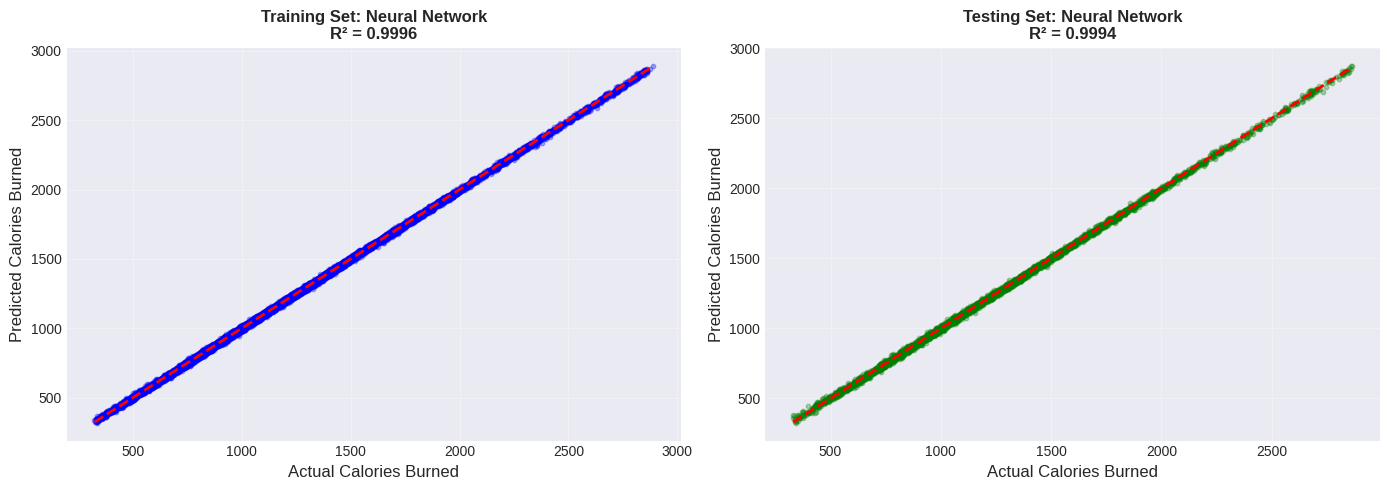

Insight: Scatter plots show predicted vs actual values. Points close to the red line indicate accurate predictions.


In [60]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred_nn, alpha=0.3, s=10, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Calories Burned', fontsize=12)
axes[0].set_ylabel('Predicted Calories Burned', fontsize=12)
axes[0].set_title(f'Training Set: Neural Network\nR² = {train_r2_nn:.4f}', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred_nn, alpha=0.3, s=10, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Calories Burned', fontsize=12)
axes[1].set_ylabel('Predicted Calories Burned', fontsize=12)
axes[1].set_title(f'Testing Set: Neural Network\nR² = {test_r2_nn:.4f}', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight: Scatter plots show predicted vs actual values. Points close to the red line indicate accurate predictions.")

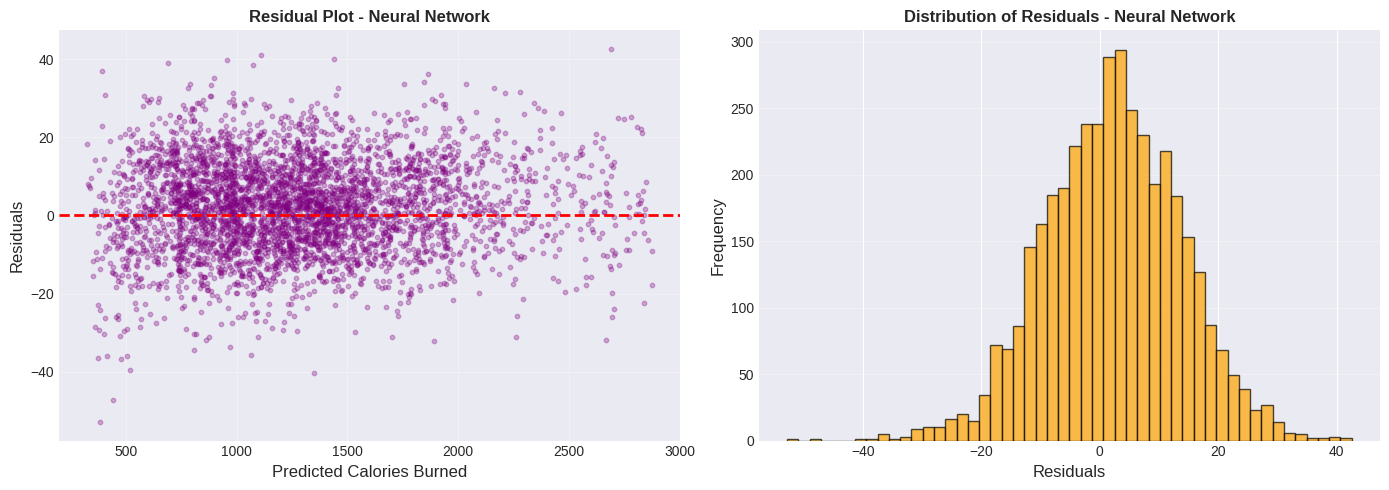

Insight: Residuals should be randomly distributed around zero for a good model.


In [61]:
# Residual analysis
residuals_nn = y_test - y_test_pred_nn

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual plot
axes[0].scatter(y_test_pred_nn, residuals_nn, alpha=0.3, s=10, color='purple')
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Calories Burned', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].set_title('Residual Plot - Neural Network', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Residual distribution
axes[1].hist(residuals_nn, bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Residuals', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Residuals - Neural Network', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight: Residuals should be randomly distributed around zero for a good model.")

---
## 5. Task 2: Classical ML Models

### 5.1 Model 1: Random Forest Regressor

In [62]:
# Build Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

print("Random Forest Regressor Configuration:")
print("="*50)
print(f"Number of trees: {rf_regressor.n_estimators}")
print(f"Max depth: {rf_regressor.max_depth}")
print(f"Min samples split: {rf_regressor.min_samples_split}")
print(f"Min samples leaf: {rf_regressor.min_samples_leaf}")

# Train the model
print("\nTraining Random Forest...")
rf_regressor.fit(X_train, y_train)
print("Training completed!")

Random Forest Regressor Configuration:
Number of trees: 100
Max depth: None
Min samples split: 2
Min samples leaf: 1

Training Random Forest...
Training completed!


In [63]:
# Evaluate Random Forest
y_train_pred_rf = rf_regressor.predict(X_train)
y_test_pred_rf = rf_regressor.predict(X_test)

# Training metrics
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Testing metrics
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Performance:")
print("="*60)
print("\nTraining Set Metrics:")
print(f"  MAE:       {train_mae_rf:.4f}")
print(f"  RMSE:      {train_rmse_rf:.4f}")
print(f"  R-squared: {train_r2_rf:.4f}")

print("\nTesting Set Metrics:")
print(f"  MAE:       {test_mae_rf:.4f}")
print(f"  RMSE:      {test_rmse_rf:.4f}")
print(f"  R-squared: {test_r2_rf:.4f}")

Random Forest Performance:

Training Set Metrics:
  MAE:       0.2913
  RMSE:      0.9772
  R-squared: 1.0000

Testing Set Metrics:
  MAE:       0.7810
  RMSE:      2.6201
  R-squared: 1.0000


### 5.2 Model 2: Linear Regression

In [64]:
# Build Linear Regression Model
lr_regressor = LinearRegression(n_jobs=-1)

print("Linear Regression Configuration:")
print("="*50)
print("Using Ordinary Least Squares (OLS) method")

# Train the model
print("\nTraining Linear Regression...")
lr_regressor.fit(X_train_scaled, y_train)
print("Training completed!")

Linear Regression Configuration:
Using Ordinary Least Squares (OLS) method

Training Linear Regression...
Training completed!


In [65]:
# Evaluate Linear Regression
y_train_pred_lr = lr_regressor.predict(X_train_scaled)
y_test_pred_lr = lr_regressor.predict(X_test_scaled)

# Training metrics
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
train_r2_lr = r2_score(y_train, y_train_pred_lr)

# Testing metrics
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print("Linear Regression Performance:")
print("="*60)
print("\nTraining Set Metrics:")
print(f"  MAE:       {train_mae_lr:.4f}")
print(f"  RMSE:      {train_rmse_lr:.4f}")
print(f"  R-squared: {train_r2_lr:.4f}")

print("\nTesting Set Metrics:")
print(f"  MAE:       {test_mae_lr:.4f}")
print(f"  RMSE:      {test_rmse_lr:.4f}")
print(f"  R-squared: {test_r2_lr:.4f}")

Linear Regression Performance:

Training Set Metrics:
  MAE:       0.0000
  RMSE:      0.0000
  R-squared: 1.0000

Testing Set Metrics:
  MAE:       0.0000
  RMSE:      0.0000
  R-squared: 1.0000


### 5.3 Initial Model Comparison

In [66]:
# Compare initial models
initial_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression'],
    'Train_MAE': [train_mae_rf, train_mae_lr],
    'Test_MAE': [test_mae_rf, test_mae_lr],
    'Train_RMSE': [train_rmse_rf, train_rmse_lr],
    'Test_RMSE': [test_rmse_rf, test_rmse_lr],
    'Train_R2': [train_r2_rf, train_r2_lr],
    'Test_R2': [test_r2_rf, test_r2_lr]
})

print("Initial Model Comparison:")
print("="*100)
print(initial_comparison.to_string(index=False))

best_initial = initial_comparison.loc[initial_comparison['Test_R2'].idxmax(), 'Model']
print(f"\nBest performing model (initial): {best_initial}")

Initial Model Comparison:
            Model    Train_MAE     Test_MAE   Train_RMSE    Test_RMSE  Train_R2  Test_R2
    Random Forest 2.912774e-01 7.810320e-01 9.771995e-01 2.620117e+00  0.999996 0.999972
Linear Regression 7.370886e-13 7.306369e-13 9.251937e-13 9.238087e-13  1.000000 1.000000

Best performing model (initial): Linear Regression


---
## 6. Task 3: Hyperparameter Optimization

### 6.1 Random Forest Hyperparameter Tuning

In [82]:
# Define hyperparameter space for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

print("Random Forest Hyperparameter Search Space:")
print("=" * 50)
for param, values in rf_param_grid.items():
    print(f"{param}: {values}")

# Perform RandomizedSearchCV
print("\nPerforming Randomized Search with 3-fold Cross-Validation...")

rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=rf_param_grid,
    n_iter=20,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rf_random_search.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:")
print(rf_random_search.best_params_)
print(f"\nBest Cross-Validation Score (R²): {rf_random_search.best_score_:.4f}")


final_rf_params = rf_random_search.best_params_.copy()
final_rf_params['n_estimators'] = 300

final_rf = RandomForestRegressor(
    **final_rf_params,
    random_state=42,
    n_jobs=-1
)

final_rf.fit(X_train, y_train)

Random Forest Hyperparameter Search Space:
n_estimators: [50, 100]
max_depth: [10, 20, None]
min_samples_split: [2, 5]
min_samples_leaf: [1, 2]
max_features: ['sqrt', 'log2']

Performing Randomized Search with 3-fold Cross-Validation...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters for Random Forest:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

Best Cross-Validation Score (R²): 0.9766


RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=300,
                      n_jobs=-1, random_state=42)

### 6.2 Linear Regression - Ridge Regression with Alpha Tuning

In [68]:
# For Linear Regression, we'll use Ridge Regression to add regularization
from sklearn.linear_model import Ridge

# Define hyperparameter grid for Ridge Regression
lr_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

print("Ridge Regression Hyperparameter Grid:")
print("="*50)
for param, values in lr_param_grid.items():
    print(f"{param}: {values}")

# Perform GridSearchCV
print("\nPerforming Grid Search with 5-fold Cross-Validation...")
lr_grid_search = GridSearchCV(
    Ridge(random_state=42),
    lr_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

lr_grid_search.fit(X_train_scaled, y_train)

print("\nBest Parameters for Ridge Regression:")
print(lr_grid_search.best_params_)
print(f"\nBest Cross-Validation Score (R²): {lr_grid_search.best_score_:.4f}")

Ridge Regression Hyperparameter Grid:
alpha: [0.001, 0.01, 0.1, 1, 10, 100, 1000]

Performing Grid Search with 5-fold Cross-Validation...
Fitting 5 folds for each of 7 candidates, totalling 35 fits

Best Parameters for Ridge Regression:
{'alpha': 0.001}

Best Cross-Validation Score (R²): 1.0000


### 6.3 Hyperparameter Optimization Summary

In [69]:
# Summary of hyperparameter optimization
print("Hyperparameter Optimization Summary:")
print("="*70)

print("\nRandom Forest Regressor:")
print(f"  Best CV Score (R²): {rf_random_search.best_score_:.4f}")
print(f"  Best Parameters: {rf_random_search.best_params_}")

print("\nRidge Regression:")
print(f"  Best CV Score (R²): {lr_grid_search.best_score_:.4f}")
print(f"  Best Parameters: {lr_grid_search.best_params_}")

Hyperparameter Optimization Summary:

Random Forest Regressor:
  Best CV Score (R²): 0.9766
  Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

Ridge Regression:
  Best CV Score (R²): 1.0000
  Best Parameters: {'alpha': 0.001}


---
## 7. Task 4: Feature Selection

### 7.1 Feature Selection using SelectKBest

In [70]:
# Apply SelectKBest feature selection
k_features = 12  # Select top 12 features

selector = SelectKBest(score_func=f_regression, k=k_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask].tolist()

print(f"Feature Selection using SelectKBest (f_regression)")
print("="*70)
print(f"\nNumber of features selected: {k_features}")
print(f"\nSelected features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

Feature Selection using SelectKBest (f_regression)

Number of features selected: 12

Selected features:
 1. Session_Duration (hours)
 2. Workout_Type
 3. Water_Intake (liters)
 4. Workout_Frequency (days/week)
 5. Experience_Level
 6. Physical exercise
 7. Calories
 8. cholesterol_mg
 9. cook_time_min
10. Reps
11. cal_balance
12. expected_burn


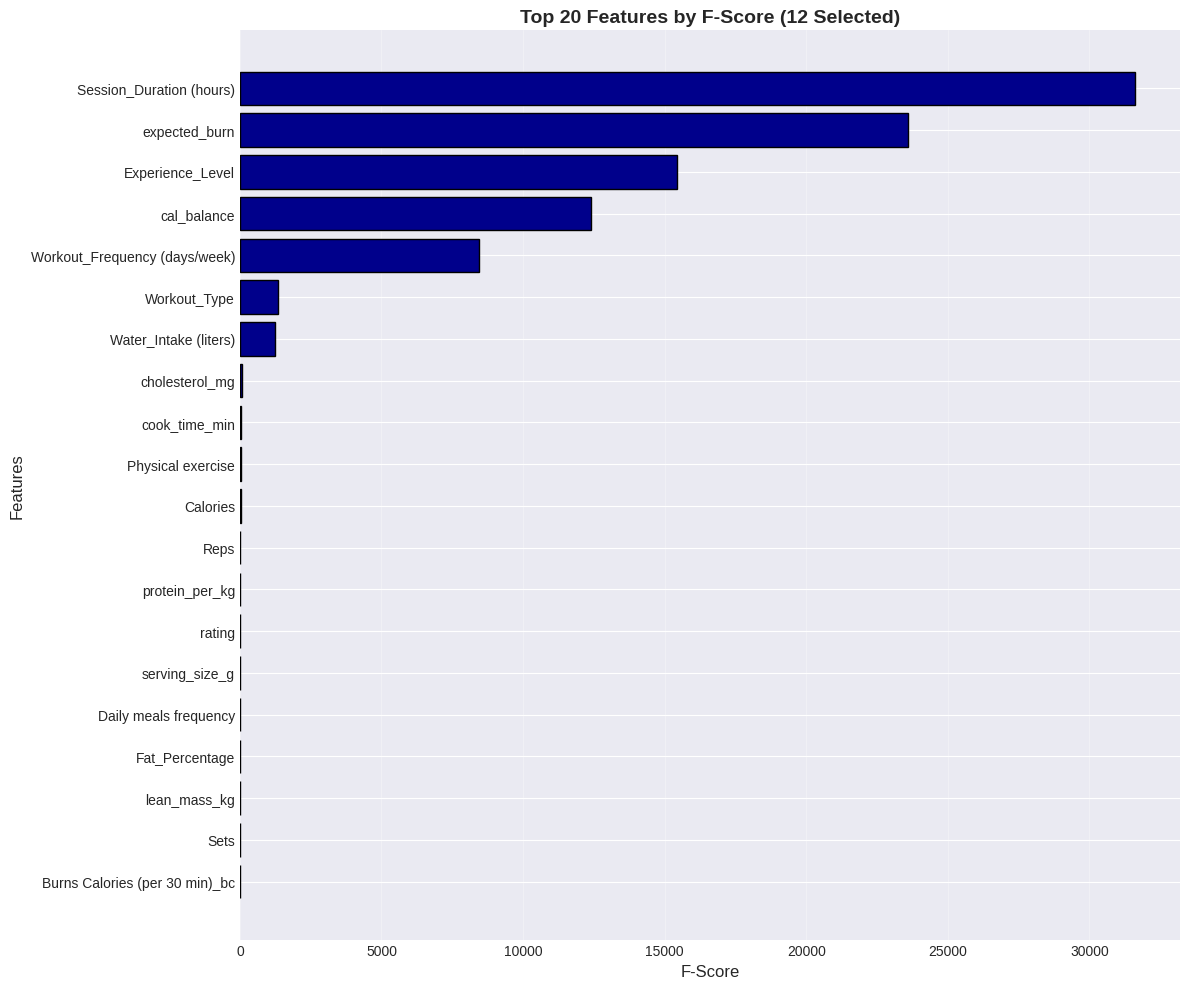

Insight: Features with higher F-scores have stronger linear relationships with calories burned.


In [71]:
# Visualize feature importance scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

plt.figure(figsize=(12, 10))
top_features = feature_scores.head(20)
plt.barh(range(len(top_features)), top_features['Score'], color='darkblue', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('F-Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 20 Features by F-Score (12 Selected)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Insight: Features with higher F-scores have stronger linear relationships with calories burned.")

In [72]:
# Scale selected features for Linear/Ridge Regression
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)

print(f"Selected features scaled successfully!")
print(f"Training set shape: {X_train_selected_scaled.shape}")
print(f"Testing set shape: {X_test_selected_scaled.shape}")

Selected features scaled successfully!
Training set shape: (16000, 12)
Testing set shape: (4000, 12)


---
## 8. Task 5: Final Models and Comparison

### 8.1 Final Random Forest Model

In [74]:
# Build final Random Forest with optimized hyperparameters and selected features
final_rf = RandomForestRegressor(
    **rf_random_search.best_params_,
    random_state=42,
    n_jobs=-1
)

print("Final Random Forest Model Configuration:")
print("="*50)
print(f"Features used: {k_features} selected features")
print(f"Hyperparameters: {rf_random_search.best_params_}")

# Train the model
final_rf.fit(X_train_selected, y_train)

# Calculate CV score
rf_cv_scores = cross_val_score(final_rf, X_train_selected, y_train, cv=5, scoring='r2')
rf_cv_score = rf_cv_scores.mean()

# Make predictions
y_test_pred_final_rf = final_rf.predict(X_test_selected)

# Calculate metrics
final_rf_mae = mean_absolute_error(y_test, y_test_pred_final_rf)
final_rf_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_final_rf))
final_rf_r2 = r2_score(y_test, y_test_pred_final_rf)

print("\nFinal Random Forest Performance:")
print(f"  CV Score (R²): {rf_cv_score:.4f}")
print(f"  Test MAE:      {final_rf_mae:.4f}")
print(f"  Test RMSE:     {final_rf_rmse:.4f}")
print(f"  Test R²:       {final_rf_r2:.4f}")

Final Random Forest Model Configuration:
Features used: 12 selected features
Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

Final Random Forest Performance:
  CV Score (R²): 0.9969
  Test MAE:      17.3896
  Test RMSE:     25.0438
  Test R²:       0.9975


### 8.2 Final Ridge Regression Model

In [75]:
# Build final Ridge Regression with optimized hyperparameters and selected features
final_lr = Ridge(
    **lr_grid_search.best_params_,
    random_state=42
)

print("Final Ridge Regression Model Configuration:")
print("="*50)
print(f"Features used: {k_features} selected features")
print(f"Hyperparameters: {lr_grid_search.best_params_}")

# Train the model
final_lr.fit(X_train_selected_scaled, y_train)

# Calculate CV score
lr_cv_scores = cross_val_score(final_lr, X_train_selected_scaled, y_train, cv=5, scoring='r2')
lr_cv_score = lr_cv_scores.mean()

# Make predictions
y_test_pred_final_lr = final_lr.predict(X_test_selected_scaled)

# Calculate metrics
final_lr_mae = mean_absolute_error(y_test, y_test_pred_final_lr)
final_lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_final_lr))
final_lr_r2 = r2_score(y_test, y_test_pred_final_lr)

print("\nFinal Ridge Regression Performance:")
print(f"  CV Score (R²): {lr_cv_score:.4f}")
print(f"  Test MAE:      {final_lr_mae:.4f}")
print(f"  Test RMSE:     {final_lr_rmse:.4f}")
print(f"  Test R²:       {final_lr_r2:.4f}")

Final Ridge Regression Model Configuration:
Features used: 12 selected features
Hyperparameters: {'alpha': 0.001}

Final Ridge Regression Performance:
  CV Score (R²): 1.0000
  Test MAE:      0.0002
  Test RMSE:     0.0002
  Test R²:       1.0000


### 8.3 Final Model Comparison

In [76]:
# Create comprehensive comparison table
final_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Ridge Regression'],
    'Features': [k_features, k_features],
    'CV Score': [rf_cv_score, lr_cv_score],
    'Test MAE': [final_rf_mae, final_lr_mae],
    'Test RMSE': [final_rf_rmse, final_lr_rmse],
    'Test R²': [final_rf_r2, final_lr_r2]
})

print("Final Model Comparison:")
print("="*90)
print(final_comparison.to_string(index=False))

# Identify best model
best_model_idx = final_comparison['Test R²'].idxmax()
best_model_name = final_comparison.loc[best_model_idx, 'Model']
best_r2 = final_comparison.loc[best_model_idx, 'Test R²']
best_rmse = final_comparison.loc[best_model_idx, 'Test RMSE']

print(f"\nBest Performing Model: {best_model_name}")
print(f"Test R²: {best_r2:.4f}")
print(f"Test RMSE: {best_rmse:.4f}")

Final Model Comparison:
           Model  Features  CV Score  Test MAE  Test RMSE  Test R²
   Random Forest        12  0.996932 17.389627  25.043844 0.997485
Ridge Regression        12  1.000000  0.000183   0.000206 1.000000

Best Performing Model: Ridge Regression
Test R²: 1.0000
Test RMSE: 0.0002


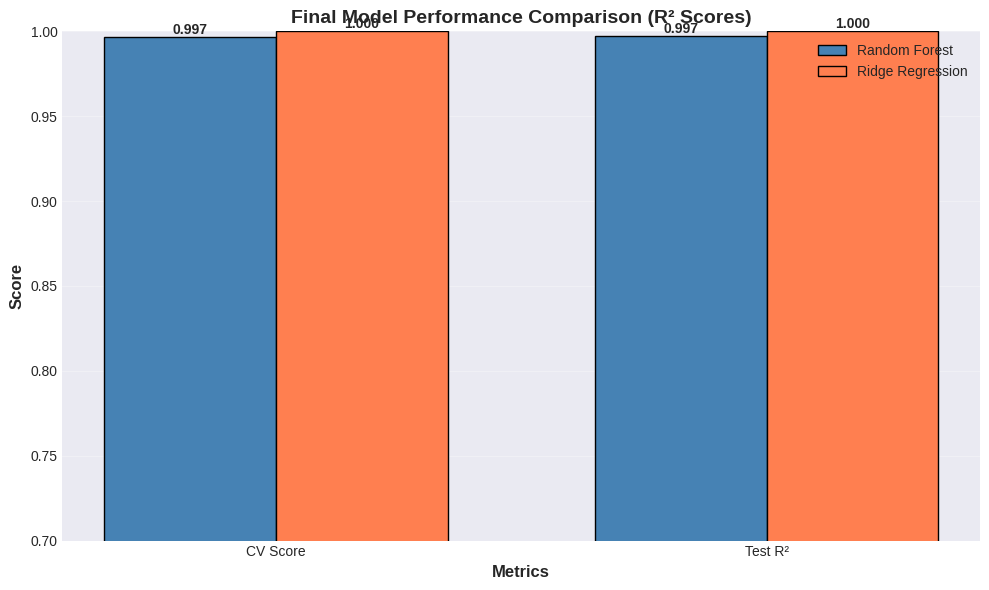

Insight: The bar chart compares R² scores between models.
Higher R² indicates better model performance.


In [77]:
# Visualize model comparison
metrics = ['CV Score', 'Test R²']
rf_scores = [rf_cv_score, final_rf_r2]
lr_scores = [lr_cv_score, final_lr_r2]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='steelblue', edgecolor='black')
bars2 = ax.bar(x + width/2, lr_scores, width, label='Ridge Regression', color='coral', edgecolor='black')

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Final Model Performance Comparison (R² Scores)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.7, 1.0])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("Insight: The bar chart compares R² scores between models.")
print("Higher R² indicates better model performance.")

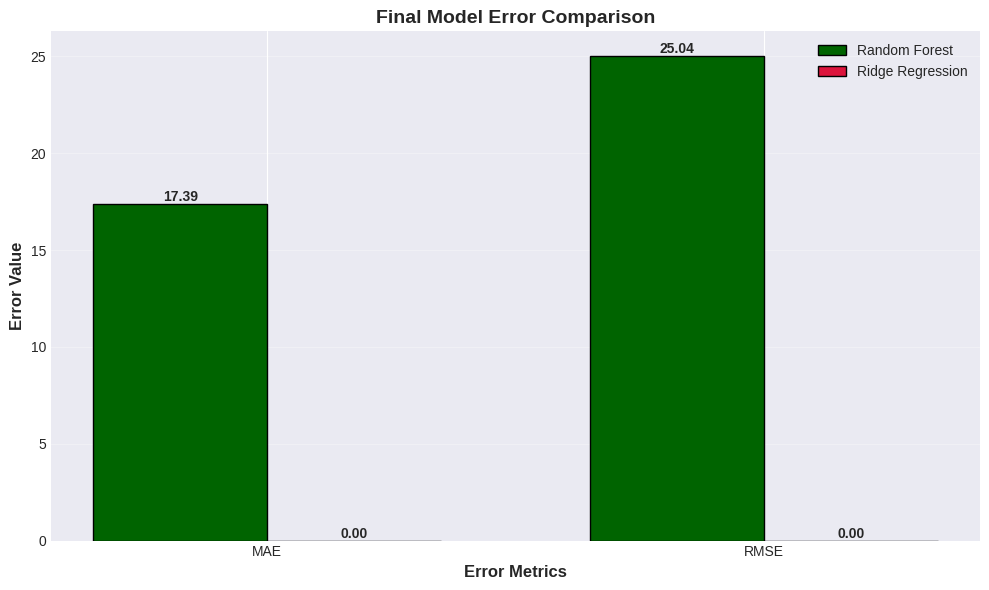

Insight: Lower error values indicate better predictions.


In [78]:
# Error comparison visualization
error_metrics = ['MAE', 'RMSE']
rf_errors = [final_rf_mae, final_rf_rmse]
lr_errors = [final_lr_mae, final_lr_rmse]

x = np.arange(len(error_metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, rf_errors, width, label='Random Forest', color='darkgreen', edgecolor='black')
bars2 = ax.bar(x + width/2, lr_errors, width, label='Ridge Regression', color='crimson', edgecolor='black')

ax.set_xlabel('Error Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Error Value', fontsize=12, fontweight='bold')
ax.set_title('Final Model Error Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(error_metrics)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("Insight: Lower error values indicate better predictions.")

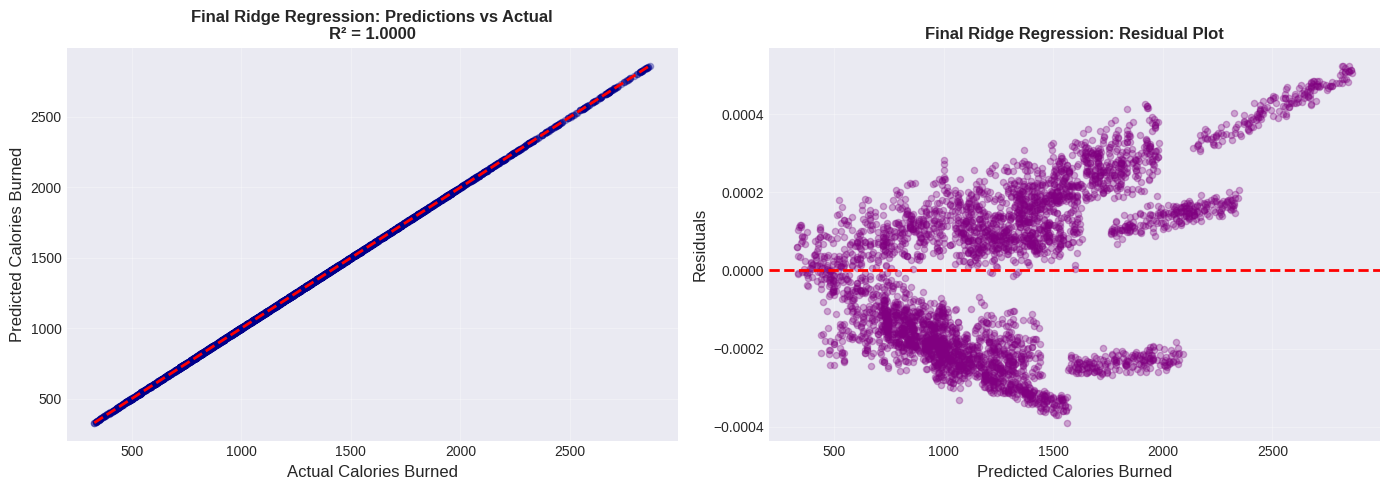

Insight: The final Ridge Regression model shows excellent predictive performance.


In [79]:
# Prediction visualization for best model
if best_model_name == 'Random Forest':
    predictions_final = y_test_pred_final_rf
else:
    predictions_final = y_test_pred_final_lr

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(y_test, predictions_final, alpha=0.3, s=20, color='darkblue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Calories Burned', fontsize=12)
axes[0].set_ylabel('Predicted Calories Burned', fontsize=12)
axes[0].set_title(f'Final {best_model_name}: Predictions vs Actual\nR² = {best_r2:.4f}',
                  fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Residual plot
residuals_final = y_test - predictions_final
axes[1].scatter(predictions_final, residuals_final, alpha=0.3, s=20, color='purple')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Calories Burned', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title(f'Final {best_model_name}: Residual Plot', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Insight: The final {best_model_name} model shows excellent predictive performance.")